<a href="https://colab.research.google.com/github/kdahun/bigdata2023/blob/main/dataAnalyze4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas
## groupby method

In [29]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"key1" : list("aabba"),"key2":["one","two","one","two","one"]
                                             ,"data1":np.random.randn(5),"data2":np.random.randn(5)})
display(df)
display(df[df["key1"]=="a"][["data1","data2"]])


,key1,key2,data1,data2
0,a,one,0.266936,1.063342
1,a,two,1.655077,-0.702266
2,b,one,2.254735,0.926881
3,b,two,-0.144648,-1.054675
4,a,one,0.432010,-0.289367


,data1,data2
0,0.266936,1.063342
1,1.655077,-0.702266
4,0.432010,-0.289367


In [20]:
display(df[["data1","data2"]].groupby(df["key1"]).mean(0))
display(df[["data1","data2"]].groupby(df["key1"]).sum(0))
display(df[["data1","data2"]].groupby(df["key1"]).max(0))
display(df[["key1","data1","data2"]].groupby("key1").mean(0))

,data1,data2
key1,,
a,-0.207123,-0.575657
b,0.511341,-0.681113


,data1,data2
key1,,
a,-0.621370,-1.726970
b,1.022682,-1.362227


,data1,data2
key1,,
a,0.782416,0.396614
b,1.462987,0.501235


,data1,data2
key1,,
a,-0.207123,-0.575657
b,0.511341,-0.681113


In [25]:
# data1과 data2의 평균 (key2에 의한 평균)

display(df[["data1","data2"]].groupby(df["key2"]).mean(0))
display(df[["key2","data1","data2"]].groupby("key2").mean(0))

,data1,data2
key2,,
one,-0.270495,0.125260
two,0.606398,-1.732488


,data1,data2
key2,,
one,-0.270495,0.125260
two,0.606398,-1.732488


In [36]:
df_group = df["data1"].groupby([df["key1"],df["key2"]]).mean(0)
print(df_group.info())
print(df_group.index)
print(df_group.values)


<class 'pandas.core.series.Series'>
MultiIndex: 4 entries, ('a', 'one') to ('b', 'two')
Series name: data1
Non-Null Count  Dtype  
--------------  -----  
4 non-null      float64
dtypes: float64(1)
memory usage: 178.0+ bytes
None
MultiIndex([('a', 'one'),
            ('a', 'two'),
            ('b', 'one'),
            ('b', 'two')],
           names=['key1', 'key2'])
[ 0.3494733   1.65507727  2.25473486 -0.1446481 ]


In [41]:
# 데이터 갯수 세기
display(df["key1"].value_counts())
display(df["key2"].value_counts())

display(df.groupby(["key1","key2"]).size())

a    3
b    2
Name: key1, dtype: int64

one    3
two    2
Name: key2, dtype: int64

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [43]:
tips = pd.read_csv("/content/drive/MyDrive/tips.csv의 사본")

In [46]:
tips.head(5)

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [55]:
# tip의 비율 tip / total_bill

tip_pct=tips["tip"]/tips["total_bill"]
tips["tip_pct"] = tip_pct
display(tips)

# tip_pct로 정렬

tips.sort_values(by="tip_pct",ascending=0).head(5)

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204


,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535


In [56]:
# 입력은 데이터 프레임이고 주어진 컬럼으로 내림차순 정렬 = >상위 5개 추출
def top(df,column="tip_pct"):
  return df.sort_values(by=column,ascending=False)[:5]

top(tips)

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535


In [60]:
# 스모커의 tip_pct 평균
display(tips.groupby("smoker")["tip_pct"].mean())
display(tips["tip_pct"].groupby(tips["smoker"]).mean())

smoker
No     0.159328
Yes    0.163196
Name: tip_pct, dtype: float64

smoker
No     0.159328
Yes    0.163196
Name: tip_pct, dtype: float64

In [69]:
# 요일별 팁 비율 평균
display(tips["tip_pct"].groupby(tips["day"]).mean())

# 시간별 팁 비율 평균
display(tips["tip_pct"].groupby(tips["time"]).mean())

# 요일 시간 계측적 팁비율 평균
display(tips["tip_pct"].groupby([tips["day"],tips["time"]]).mean())

# 3의 결과를 테이블 형태로 출력
display(pd.DataFrame(tips["tip_pct"].groupby([tips["day"],tips["time"]]).mean()))
display(pd.DataFrame(tips["tip_pct"].groupby([tips["day"],tips["time"]]).mean()).unstack())


day
Fri     0.169913
Sat     0.153152
Sun     0.166897
Thur    0.161276
Name: tip_pct, dtype: float64

time
Dinner    0.159518
Lunch     0.164128
Name: tip_pct, dtype: float64

day   time  
Fri   Dinner    0.158916
      Lunch     0.188765
Sat   Dinner    0.153152
Sun   Dinner    0.166897
Thur  Dinner    0.159744
      Lunch     0.161301
Name: tip_pct, dtype: float64

tip_pct
day  time            
Fri  Dinner  0.158916
     Lunch   0.188765
Sat  Dinner  0.153152
Sun  Dinner  0.166897
Thur Dinner  0.159744
     Lunch   0.161301

tip_pct          
time    Dinner     Lunch
day                     
Fri   0.158916  0.188765
Sat   0.153152       NaN
Sun   0.166897       NaN
Thur  0.159744  0.161301

In [74]:
# time 인덱스로 day가 컬럼으로 오도록

display(tips["tip_pct"].groupby([tips["time"],tips["day"]]).mean().unstack(fill_value=0))

day,Fri,Sat,Sun,Thur
time,,,,
Dinner,0.158916,0.153152,0.166897,0.159744
Lunch,0.188765,0.000000,0.000000,0.161301


In [81]:
display(tips["size"].groupby([tips["smoker"],tips["day"]]).sum().unstack(fill_value = 0))
display(tips["tip"].groupby([tips["smoker"],tips["day"]]).mean().unstack(fill_value = 0))
display(tips.groupby([tips["smoker"],tips["day"]]).size().unstack(fill_value = 0))

day,Fri,Sat,Sun,Thur
smoker,,,,
No,9,115,167,112
Yes,31,104,49,40


day,Fri,Sat,Sun,Thur
smoker,,,,
No,2.8125,3.102889,3.167895,2.673778
Yes,2.7140,2.875476,3.516842,3.030000


day,Fri,Sat,Sun,Thur
smoker,,,,
No,4,45,57,45
Yes,15,42,19,17


In [83]:
def top(df, column="tip_pct"):
  return df.sort_values(by=column, ascending=False)[:5]
top(tips, column="tip_pct")


,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535


In [86]:
display(tips.groupby("smoker").apply(top))
display(tips.groupby("smoker").apply(top,column='total_bill'))

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     232       11.61  3.39     No   Sat  Dinner     2  0.291990
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       88        24.71  5.85     No  Thur   Lunch     2  0.236746
Yes    172        7.25  5.15    Yes   Sun  Dinner     2  0.710345
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       109       14.31  4.00    Yes   Sat  Dinner     2  0.279525

total_bill    tip smoker   day    time  size   tip_pct
smoker                                                            
No     212       48.33   9.00     No   Sat  Dinner     4  0.186220
       59        48.27   6.73     No   Sat  Dinner     4  0.139424
       156       48.17   5.00     No   Sun  Dinner     6  0.103799
       142       41.19   5.00     No  Thur   Lunch     5  0.121389
       23        39.42   7.58     No   Sat  Dinner     4  0.192288
Yes    170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       102       44.30   2.50    Yes   Sat  Dinner     3  0.056433
       197       43.11   5.00    Yes  Thur   Lunch     4  0.115982
       184       40.55   3.00    Yes   Sun  Dinner     2  0.073983

### 피벗테이블 : 데이터를 하나 이상의 키로 수집하여 어떤키는 행에, 어떤 키는 열에 나열해서 정렬한다.

In [92]:
display(tips.pivot_table(index=['time','smoker']))
display(tips.groupby(["time","smoker"]).mean(0))

<ipython-input-92-636612cc3545>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  display(tips.pivot_table(index=['time','smoker']))


size       tip   tip_pct  total_bill
time   smoker                                          
Dinner No      2.735849  3.126887  0.158653   20.095660
       Yes     2.471429  3.066000  0.160828   21.859429
Lunch  No      2.511111  2.673778  0.160920   17.050889
       Yes     2.217391  2.834348  0.170404   17.399130

<ipython-input-92-636612cc3545>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  display(tips.groupby(["time","smoker"]).mean(0))


total_bill       tip      size   tip_pct
time   smoker                                          
Dinner No       20.095660  3.126887  2.735849  0.158653
       Yes      21.859429  3.066000  2.471429  0.160828
Lunch  No       17.050889  2.673778  2.511111  0.160920
       Yes      17.399130  2.834348  2.217391  0.170404

In [114]:
display(tips.pivot_table(["size","tip_pct"],index = ["day","time"],columns = "smoker",fill_value=0))
display(tips.pivot_table(["size"],index = ["day","time"],columns = "smoker",fill_value=0,aggfunc='sum'))
display(tips['size'].groupby([tips["day"],tips["time"]]).mean().unstack())

size             tip_pct          
smoker             No       Yes        No       Yes
day  time                                          
Fri  Dinner  2.000000  2.222222  0.139622  0.165347
     Lunch   3.000000  1.833333  0.187735  0.188937
Sat  Dinner  2.555556  2.476190  0.158048  0.147906
Sun  Dinner  2.929825  2.578947  0.160113  0.187250
Thur Dinner  2.000000  0.000000  0.159744  0.000000
     Lunch   2.500000  2.352941  0.160311  0.163863

size     
smoker        No  Yes
day  time            
Fri  Dinner    6   20
     Lunch     3   11
Sat  Dinner  115  104
Sun  Dinner  167   49
Thur Dinner    2    0
     Lunch   110   40

time,Dinner,Lunch
day,,
Fri,2.166667,2.000000
Sat,2.517241,NaN
Sun,2.842105,NaN
Thur,2.000000,2.459016


# matplotlib

In [115]:
import matplotlib.pyplot as plt

%matplotlib inline

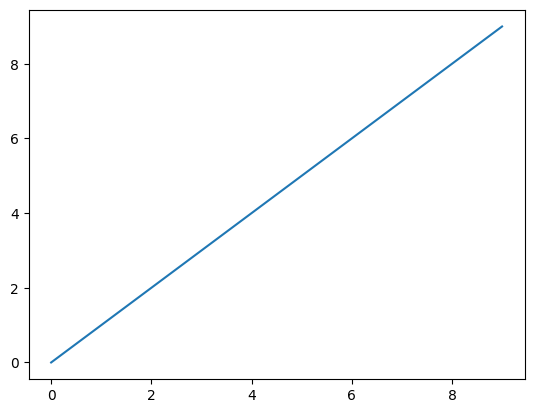

In [119]:
data = np.arange(10)
plt.plot(data)
plt.show()

(array([ 1.,  1.,  2.,  0.,  0.,  2.,  1.,  4.,  2.,  6.,  9.,  9.,  9.,
        10., 12., 14., 22., 21., 30., 30., 26., 26., 35., 54., 52., 39.,
        64., 41., 38., 46., 54., 43., 31., 39., 26., 33., 33., 20., 21.,
        24., 13., 11., 12.,  8., 11.,  5.,  3.,  2.,  4.,  1.]),
 array([-3.29450963, -3.17625897, -3.05800831, -2.93975764, -2.82150698,
        -2.70325631, -2.58500565, -2.46675499, -2.34850432, -2.23025366,
        -2.11200299, -1.99375233, -1.87550167, -1.757251  , -1.63900034,
        -1.52074967, -1.40249901, -1.28424834, -1.16599768, -1.04774702,
        -0.92949635, -0.81124569, -0.69299502, -0.57474436, -0.4564937 ,
        -0.33824303, -0.21999237, -0.1017417 ,  0.01650896,  0.13475962,
         0.25301029,  0.37126095,  0.48951162,  0.60776228,  0.72601294,
         0.84426361,  0.96251427,  1.08076494,  1.1990156 ,  1.31726627,
         1.43551693,  1.55376759,  1.67201826,  1.79026892,  1.90851959,
         2.02677025,  2.14502091,  2.26327158,  2.38152224,

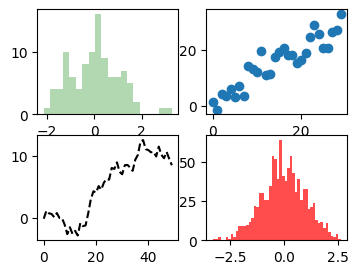

In [138]:
fig = plt.figure(figsize=(4,3))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
ax3.plot(np.random.randn(50).cumsum(),"k--")
ax1.hist(np.random.randn(100),bins=20,color='g',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))


ax4.hist(np.random.randn(1000),bins=50,color='r',alpha=0.7)

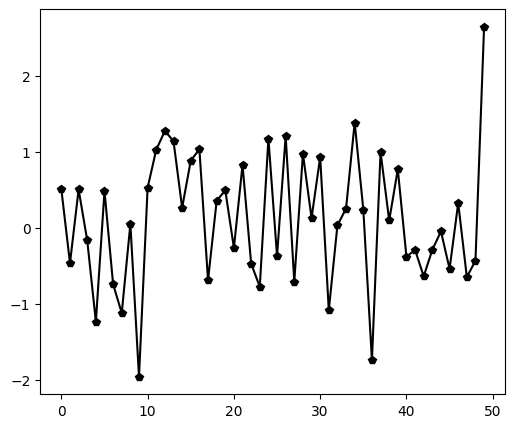

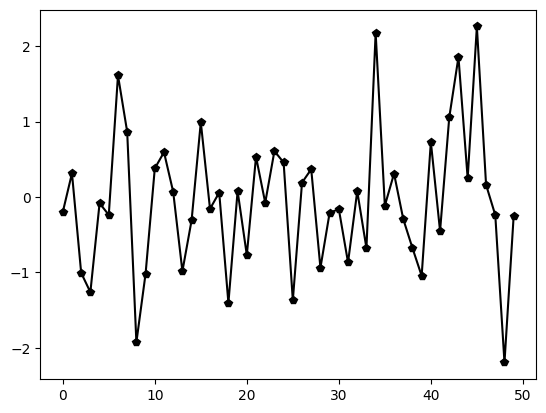

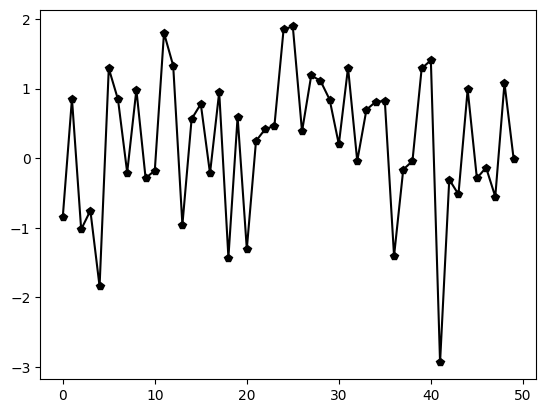

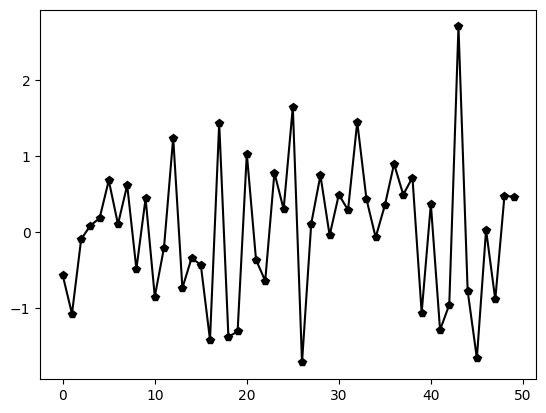

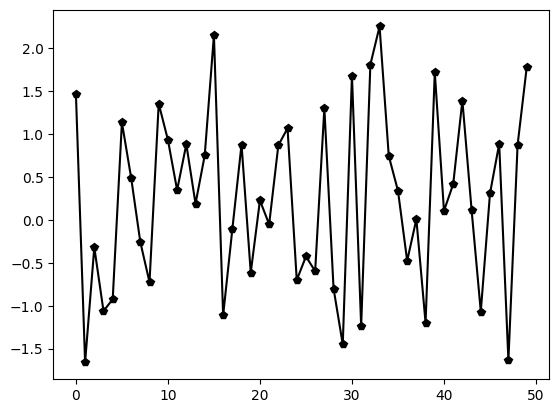

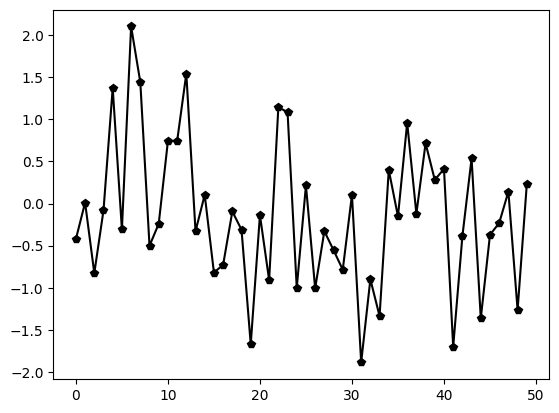

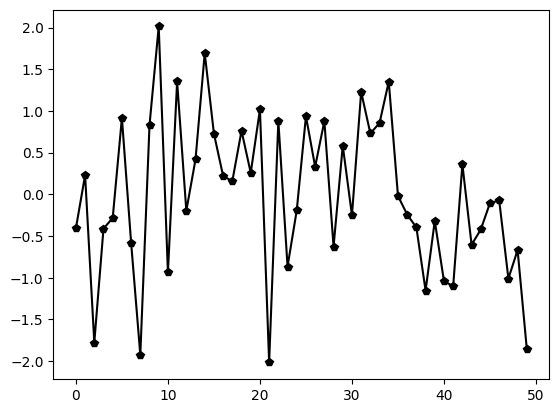

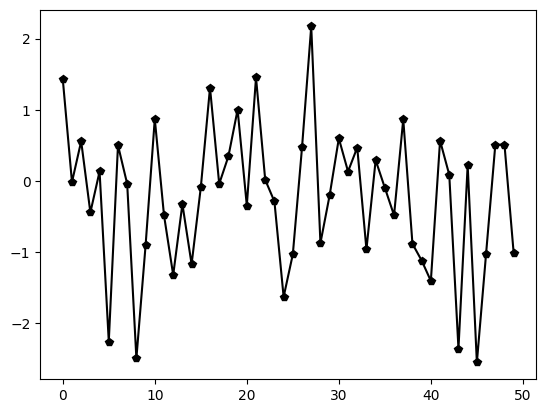

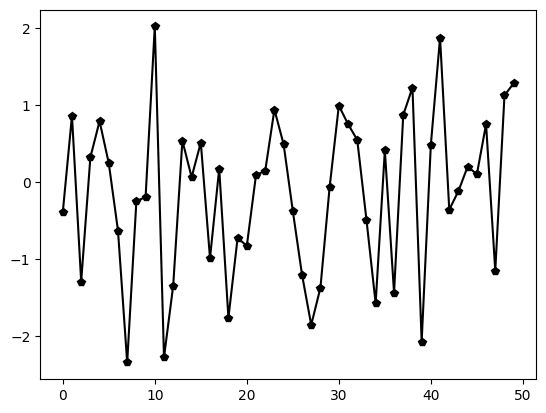

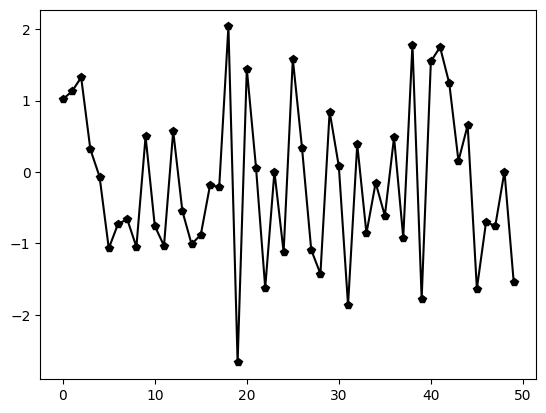

In [146]:
fig = plt.figure(figsize=(6,5))

for i in range(10):
  plt.plot(np.random.randn(50),"kp-")
  plt.show()
  plt.close()

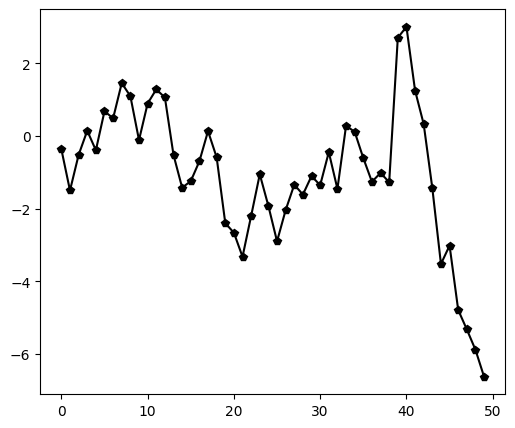

In [151]:
fig = plt.figure(figsize=(6,5))
plt.plot(np.random.randn(50).cumsum(),"kp-")

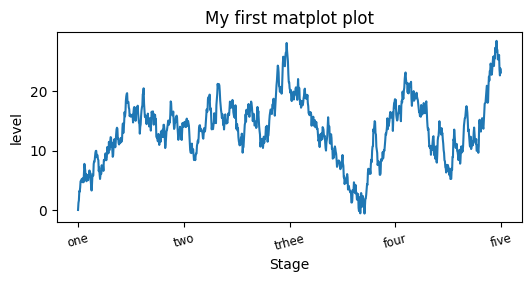

In [164]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
ax.set_title("My first matplot plot")
ax.set_xlabel("Stage")
ax.set_ylabel("level")

ax.set_xticks([0,250,500,750,1000])
ax.set_xticklabels(["one","two","trhee","four","five"],fontsize="small",rotation=15)

fig.subplots_adjust(bottom=0.5)

plt.show()

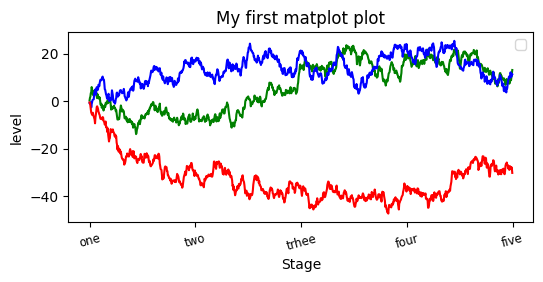

In [166]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(),"g")
ax.plot(np.random.randn(1000).cumsum(),"b")
ax.plot(np.random.randn(1000).cumsum(),"r")
ax.set_title("My first matplot plot")
ax.set_xlabel("Stage")
ax.set_ylabel("level")

ax.set_xticks([0,250,500,750,1000])
ax.set_xticklabels(["one","two","trhee","four","five"],fontsize="small",rotation=15)
ax.legend(loc="best")

fig.subplots_adjust(bottom=0.5)

plt.show()

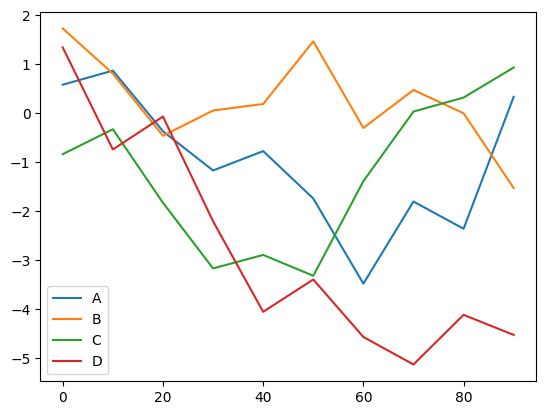

In [169]:
df=pd.DataFrame(np.random.randn(10,4).cumsum(0),columns=list("ABCD"),
                index=np.arange(0,100,10))
df.plot()
plt.show()

time,Dinner,Lunch
day,,
Fri,0.158916,0.188765
Sat,0.153152,0.000000
Sun,0.166897,0.000000
Thur,0.159744,0.161301


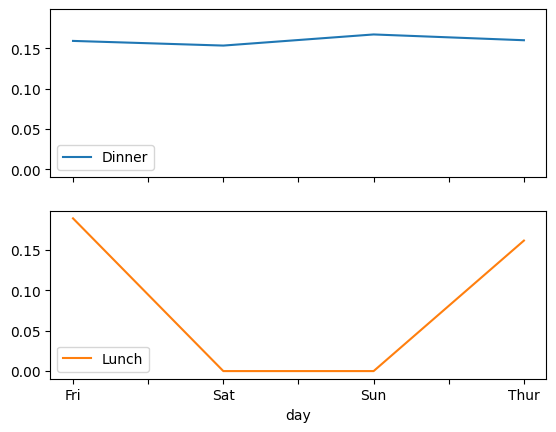

<Axes: xlabel='day'>

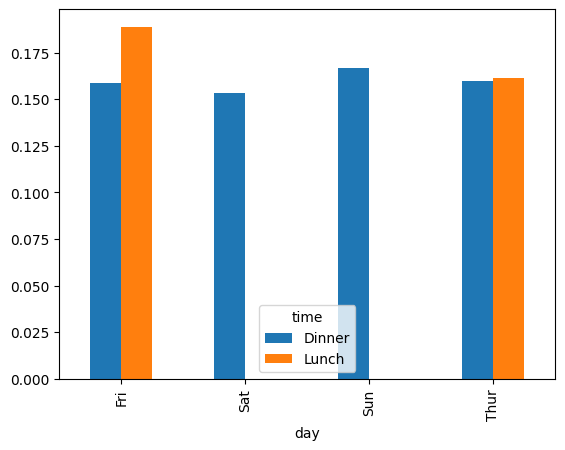

In [201]:
# day, time 별로 groupby 한후 계층별로 tip_pct 평균을 계산

a=tips["tip_pct"].groupby([tips["day"],tips["time"]]).mean().unstack(fill_value=0)
display(a)

# 이 결과를 시각화

a.plot(subplots=True,sharey=True)
plt.show()

a.plot.bar()

# 전처리

In [229]:
concrete = pd.read_csv("/content/drive/MyDrive/concrete_na.csv의 사본")

In [230]:
# 결측치 처리
display(concrete.head(4))
print(concrete.info())
print(concrete.isnull())
print(concrete.isnull().sum())

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1029 non-null   float64
 1   slag          1027 non-null   float64
 2   ash           1029 non-null   float64
 3   water         1029 non-null   float64
 4   superplastic  1023 non-null   float64
 5   coarseagg     1029 non-null   float64
 6   fineagg       1028 non-null   float64
 7   age           1029 non-null   float64
 8   strength      1028 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB
None
      cement   slag    ash  water  superplastic  coarseagg  fineagg    age  \
0      False  False  False  False         False      False    False  False   
1      False  False  False  False         False      False    False  False   
2      False  False  False  False         False      False    False  False   
3      False  False  False  False         False      False    F

In [231]:
concrete.iloc[2:4,:]=np.nan
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3.0,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270.0,55.06


In [232]:
concrete.dropna(0,how="all",inplace=True)# all은 전체가 nan값일때 any는 1개라도 nan일때
concrete

<ipython-input-232-a7461b2f6e82>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  concrete.dropna(0,how="all",inplace=True)# all은 전체가 nan값일때 any는 1개라도 nan일때


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90.0,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7.0,15.75
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3.0,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270.0,55.06


In [233]:
concrete[["superplastic"]].describe()

,superplastic
count,1021.000000
mean,6.219099
std,5.987670
min,0.000000
25%,0.000000
50%,6.400000
75%,10.200000
max,32.200000


<Axes: >

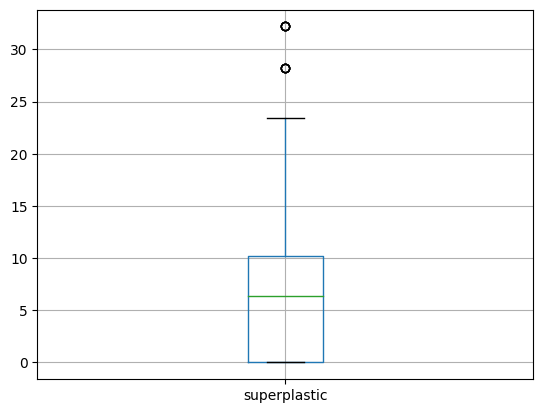

In [234]:
concrete[["superplastic"]].boxplot()

In [235]:
concrete["superplastic"]=concrete["superplastic"].fillna(concrete["superplastic"].mean())

In [236]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1027 non-null   float64
 1   slag          1025 non-null   float64
 2   ash           1027 non-null   float64
 3   water         1027 non-null   float64
 4   superplastic  1027 non-null   float64
 5   coarseagg     1027 non-null   float64
 6   fineagg       1026 non-null   float64
 7   age           1027 non-null   float64
 8   strength      1026 non-null   float64
dtypes: float64(9)
memory usage: 80.2 KB


In [237]:
concrete["slag"]=concrete["slag"].fillna(concrete["slag"].median())
concrete["fineagg"]=concrete["fineagg"].fillna(0)

In [238]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1027 non-null   float64
 1   slag          1027 non-null   float64
 2   ash           1027 non-null   float64
 3   water         1027 non-null   float64
 4   superplastic  1027 non-null   float64
 5   coarseagg     1027 non-null   float64
 6   fineagg       1027 non-null   float64
 7   age           1027 non-null   float64
 8   strength      1026 non-null   float64
dtypes: float64(9)
memory usage: 80.2 KB


In [239]:
concrete.dropna(0,how='any',inplace=True)
concrete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1026 non-null   float64
 1   slag          1026 non-null   float64
 2   ash           1026 non-null   float64
 3   water         1026 non-null   float64
 4   superplastic  1026 non-null   float64
 5   coarseagg     1026 non-null   float64
 6   fineagg       1026 non-null   float64
 7   age           1026 non-null   float64
 8   strength      1026 non-null   float64
dtypes: float64(9)
memory usage: 80.2 KB


<ipython-input-239-bb13556ae722>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  concrete.dropna(0,how='any',inplace=True)


In [240]:
sub_concrete=concrete[100:110].copy()
duplicate_concrete=pd.concat([concrete,sub_concrete],0)
duplicate_concrete.tail(20)

<ipython-input-240-624bff61d14d>:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  duplicate_concrete=pd.concat([concrete,sub_concrete],0)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1020,183.9,122.6,0.0,203.5,0.0,959.2,800.0,7.0,10.79
1021,203.5,305.3,0.0,203.5,0.0,963.4,630.0,3.0,9.56
1022,144.8,0.0,133.6,180.8,11.1,979.5,811.5,28.0,13.20
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7.0,10.39
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3.0,21.91
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3.0,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270.0,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7.0,52.61


In [242]:
duplicate_concrete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1036 entries, 0 to 111
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1036 non-null   float64
 1   slag          1036 non-null   float64
 2   ash           1036 non-null   float64
 3   water         1036 non-null   float64
 4   superplastic  1036 non-null   float64
 5   coarseagg     1036 non-null   float64
 6   fineagg       1036 non-null   float64
 7   age           1036 non-null   float64
 8   strength      1036 non-null   float64
dtypes: float64(9)
memory usage: 80.9 KB


In [248]:
duplicate_concrete.duplicated().sum()# 데이터가 중복이 되어있는지 확인

0

In [247]:
duplicate_concrete.drop_duplicates(inplace=True)